# Financial Fraud Detection Model with Dashboard

This notebook demonstrates preprocessing and feature engineering tailored for the PaySim-like dataset.

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# Load dataset
df = pd.read_csv('/content/financial_transactions.csv')  # Update with your actual CSV file path
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [30]:
# Drop identifiers
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


In [31]:
# Encode the 'type' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


In [32]:
# Create error balance features
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorBalanceDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']


In [33]:
# Define features and labels
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']


In [34]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
# Train a RandomForest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Classification Report after Preprocessing


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     92683
         1.0       0.95      0.91      0.93        46

    accuracy                           1.00     92729
   macro avg       0.98      0.96      0.97     92729
weighted avg       1.00      1.00      1.00     92729



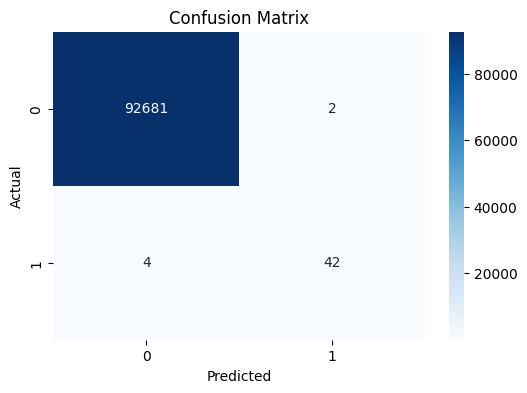

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/financial_transactions.csv')  # Update with your actual CSV file path

# Drop rows where the target variable 'isFraud' is NaN
df.dropna(subset=['isFraud'], inplace=True)

df.head()

# Drop identifiers
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Encode the 'type' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Create error balance features
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorBalanceDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']

# Define features and labels
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Implement Multiple Models

1.   Logistic Regression
2.   XGBoost



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Function to train and evaluate supervised models
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, preds)
    print(f"{name} - Accuracy: {acc:.4f}, ROC-AUC: {roc:.4f}")
    print(classification_report(y_test, preds))

# Supervised Models
log_reg = LogisticRegression(max_iter=1000)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

print("\n--- Logistic Regression ---")
evaluate_model(log_reg, "Logistic Regression")

print("\n--- XGBoost ---")
evaluate_model(xgb, "XGBoost")



--- Logistic Regression ---
Logistic Regression - Accuracy: 0.9995, ROC-AUC: 0.5435
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     92683
         1.0       0.57      0.09      0.15        46

    accuracy                           1.00     92729
   macro avg       0.79      0.54      0.58     92729
weighted avg       1.00      1.00      1.00     92729


--- XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:03:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9999, ROC-AUC: 0.9130
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     92683
         1.0       0.88      0.83      0.85        46

    accuracy                           1.00     92729
   macro avg       0.94      0.91      0.93     92729
weighted avg       1.00      1.00      1.00     92729



## using Unsupervised Models

*   Isolation Forest
*   One-class SVM



In [38]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.001)
iso_preds = iso_forest.fit_predict(X_test)
iso_preds = [1 if p == -1 else 0 for p in iso_preds]  # -1: anomaly

print("\n--- Isolation Forest ---")
print(classification_report(y_test, iso_preds))

# One-Class SVM
svm = OneClassSVM(nu=0.001, kernel='rbf', gamma=0.1)
svm_preds = svm.fit_predict(X_test)
svm_preds = [1 if p == -1 else 0 for p in svm_preds]

print("\n--- One-Class SVM ---")
print(classification_report(y_test, svm_preds))



--- Isolation Forest ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     92683
         1.0       0.01      0.02      0.01        46

    accuracy                           1.00     92729
   macro avg       0.51      0.51      0.51     92729
weighted avg       1.00      1.00      1.00     92729


--- One-Class SVM ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     92683
         1.0       0.03      0.13      0.04        46

    accuracy                           1.00     92729
   macro avg       0.51      0.56      0.52     92729
weighted avg       1.00      1.00      1.00     92729



## Evaluation and Compare Models

In [39]:
model_scores = {}

# Import f1_score
from sklearn.metrics import f1_score

# Supervised model predictions
for name, model in [("Logistic Regression", log_reg), ("XGBoost", xgb), ("Random Forest", clf)]:
    preds = model.predict(X_test)
    model_scores[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, preds),
        "F1-Score": f1_score(y_test, preds)
    }

# Unsupervised models (already predicted earlier)
model_scores["Isolation Forest"] = {
    "Accuracy": accuracy_score(y_test, iso_preds),
    "ROC-AUC": roc_auc_score(y_test, iso_preds),
    "F1-Score": f1_score(y_test, iso_preds)
}

model_scores["One-Class SVM"] = {
    "Accuracy": accuracy_score(y_test, svm_preds),
    "ROC-AUC": roc_auc_score(y_test, svm_preds),
    "F1-Score": f1_score(y_test, svm_preds)
}

# Convert to DataFrame for plotting
score_df = pd.DataFrame(model_scores).T
score_df = score_df.sort_values(by="F1-Score", ascending=False)
score_df

,Accuracy,ROC-AUC,F1-Score
Random Forest,0.999935,0.956511,0.933333
XGBoost,0.999860,0.913017,0.853933
Logistic Regression,0.999515,0.543462,0.150943
One-Class SVM,0.997239,0.564052,0.044776
Isolation Forest,0.998523,0.510373,0.014388


from matplotlib import pyplot as plt
score_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score_df['ROC-AUC'].plot(kind='hist', bins=20, title='ROC-AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score_df['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score_df.plot(kind='scatter', x='Accuracy', y='ROC-AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score_df.plot(kind='scatter', x='ROC-AUC', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score_df['ROC-AUC'].plot(kind='line', figsize=(8, 4), title='ROC-AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score_df['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)

## Plot Comparison

<Figure size 1000x600 with 0 Axes>

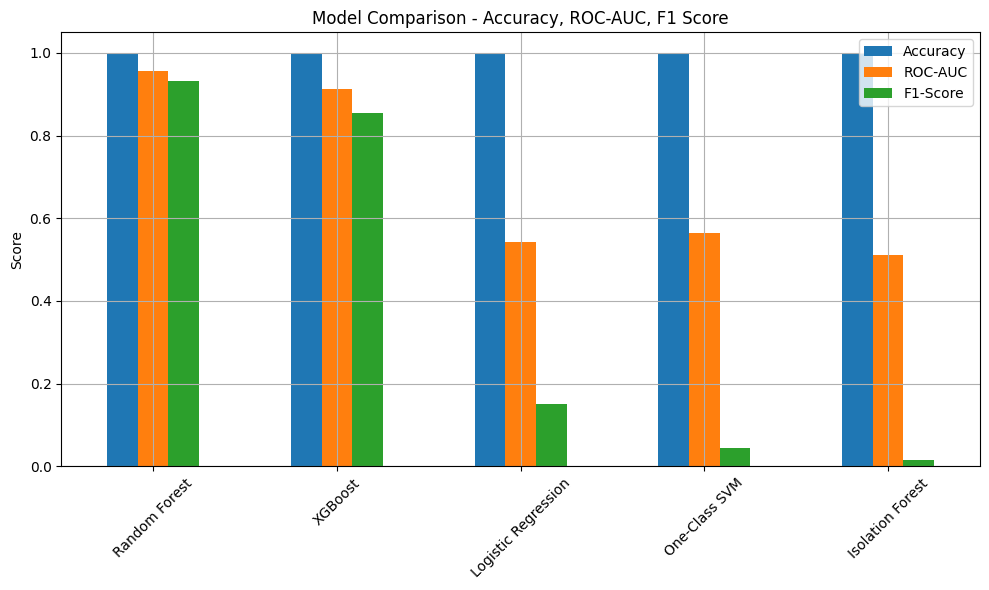

In [40]:
# Plot bar charts
plt.figure(figsize=(10,6))
score_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison - Accuracy, ROC-AUC, F1 Score")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Real-Time Transaction Simulation

In [41]:
# Modified simulate_streaming function
def simulate_streaming(model, X_data_scaled, X_data_df, original_df, delay=0.5, n_transactions=20):
    print("=== Real-Time Fraud Detection Simulation ===\n")
    count = 0

    for i in range(len(X_data_scaled)):
        # Use NumPy indexing for the scaled data
        txn_scaled = X_data_scaled[i].reshape(1, -1)
        prediction = model.predict(txn_scaled)[0]

        # Get the original index from the DataFrame version of the test data
        original_index = X_data_df.index[i]

        # Get original transaction details from the full original_df using the original index
        txn_info = original_df.iloc[original_index]
        txn_id = f"TXN_{original_index}"

        # Print transaction
        print(f"Transaction ID: {txn_id}")
        print(f"Amount: ₹{txn_info['amount']:.2f} | Type: {txn_info['type']}")
        # Need to re-obtain nameOrig and nameDest as they were dropped earlier
        # For demonstration, we'll just print the index and amount/type
        # print(f"From: {txn_info['nameOrig']} → To: {txn_info['nameDest']}") # This will cause error

        if prediction == 1:
            print("⚠️ ALERT: Fraudulent transaction detected!\n")
        else:
            print("✅ Transaction is normal.\n")

        time.sleep(delay)
        count += 1
        if count >= n_transactions:
            break

# Simulate with XGBoost (or replace with best model) - Pass both scaled array and DataFrame
simulate_streaming(xgb, X_test_scaled, X_test_df, df, delay=0.8, n_transactions=15)

=== Real-Time Fraud Detection Simulation ===

Transaction ID: TXN_374228
Amount: ₹33969.32 | Type: 1.0
✅ Transaction is normal.

Transaction ID: TXN_120621
Amount: ₹5725.46 | Type: 3.0
✅ Transaction is normal.

Transaction ID: TXN_13995
Amount: ₹600899.63 | Type: 4.0
✅ Transaction is normal.

Transaction ID: TXN_39105
Amount: ₹9857.36 | Type: 3.0
✅ Transaction is normal.

Transaction ID: TXN_332337
Amount: ₹91455.56 | Type: 0.0
✅ Transaction is normal.

Transaction ID: TXN_187469
Amount: ₹249175.11 | Type: 1.0
✅ Transaction is normal.

Transaction ID: TXN_176499
Amount: ₹343815.57 | Type: 0.0
✅ Transaction is normal.

Transaction ID: TXN_437368
Amount: ₹86487.58 | Type: 0.0
✅ Transaction is normal.

Transaction ID: TXN_371782
Amount: ₹75468.87 | Type: 1.0
✅ Transaction is normal.

Transaction ID: TXN_462670
Amount: ₹310528.82 | Type: 4.0
✅ Transaction is normal.

Transaction ID: TXN_70663
Amount: ₹44497.87 | Type: 0.0
✅ Transaction is normal.

Transaction ID: TXN_393487
Amount: ₹22878.